## Preprocessing using the [TON_IoT](https://research.unsw.edu.au/projects/toniot-datasets) dataset.

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.utils import shuffle
import seaborn as sb

In [21]:
# Read the dataset
dataset = pd.read_csv('./datasets/IoT_Weather.csv')
dataset.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [22]:
dataset.describe()

,temperature,pressure,humidity,label
count,650242.000000,650242.000000,650242.000000,650242.000000
mean,36.068693,2.014001,51.639290,0.139216
std,8.179922,7.945270,27.035446,0.346172
min,20.507282,-37.632097,0.000162,0.000000
25%,29.116196,0.040772,28.664575,0.000000
50%,36.780820,1.288340,52.649651,0.000000
75%,43.062492,4.134239,74.651183,0.000000
max,50.000000,26.685611,99.889498,1.000000


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         650242 non-null  object 
 1   time         650242 non-null  object 
 2   temperature  650242 non-null  float64
 3   pressure     650242 non-null  float64
 4   humidity     650242 non-null  float64
 5   label        650242 non-null  int64  
 6   type         650242 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 34.7+ MB


In [24]:
# Remove the time and date, and rename the type 
dataset = dataset.drop('date', axis=1)
dataset = dataset.drop('time', axis=1)
dataset = dataset.rename(columns={'type': 'target'})
dataset.head()

,temperature,pressure,humidity,label,target
0,31.788508,1.035,32.036579,0,normal
1,41.630997,1.035,30.886165,0,normal
2,42.256959,1.035,19.755908,0,normal
3,49.116581,1.035,78.949621,0,normal
4,24.017085,1.035,40.001059,0,normal


In [25]:
# Normalize the dataset, and shuffle it
normalize = ['temperature', 'pressure', 'humidity']
scaler = Normalizer()
dataset[normalize] = scaler.fit_transform(dataset[normalize])
dataset = shuffle(dataset, random_state=42)
dataset.head()

,temperature,pressure,humidity,label,target
622000,0.321077,0.023410,0.946764,0,normal
218767,0.434641,0.013288,0.900506,0,normal
331426,0.433907,0.203278,0.877726,0,normal
218657,0.930075,0.027814,0.366315,0,normal
164213,0.956026,0.007590,0.293182,0,normal


In [26]:
dataset['label'].value_counts()

label
0    559718
1     90524
Name: count, dtype: int64

<Axes: xlabel='label'>

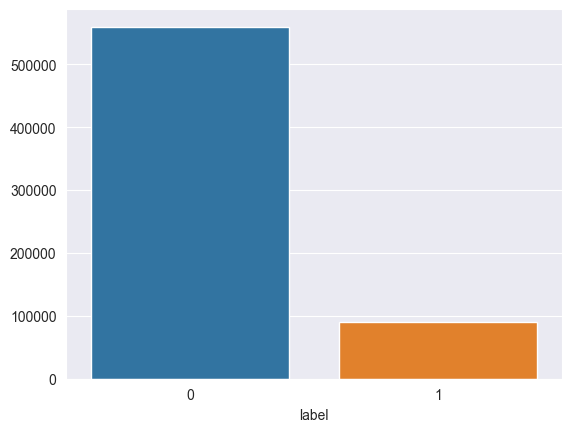

In [27]:
sb.barplot(y=dataset['label'].value_counts().values, x=dataset['label'].value_counts().index)

In [28]:
dataset_label = dataset[['temperature', 'pressure', 'humidity', 'label']]
dataset_label.to_csv("./datasets/label_data.csv", index=False, header=True)

In [29]:
dataset['target'].value_counts()

target
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

<Axes: xlabel='target'>

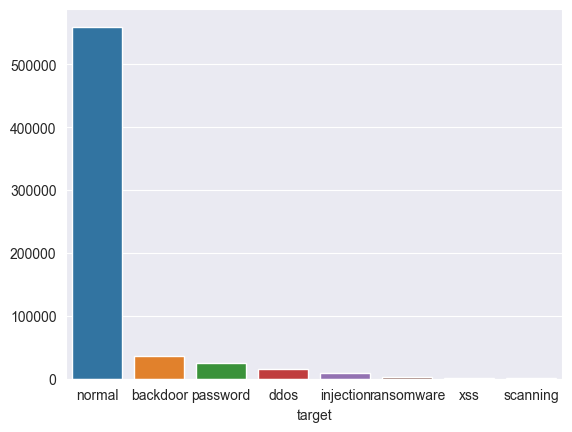

In [30]:
sb.barplot(y=dataset['target'].value_counts().values, x=dataset['target'].value_counts().index)

<Axes: title={'center': 'Targets Distribution'}>

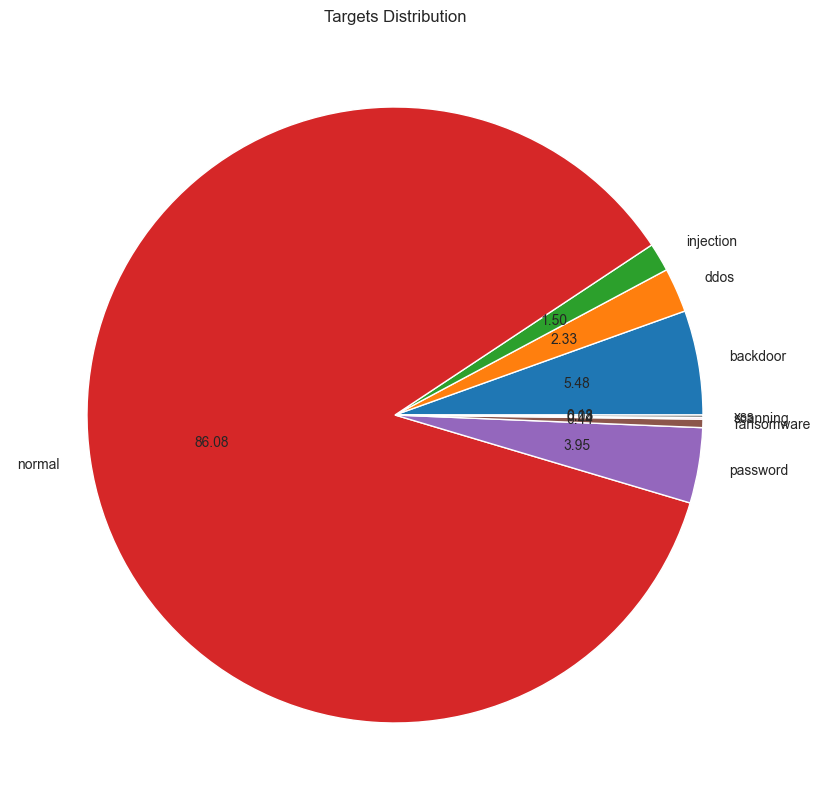

In [31]:
# Show the targets distribution
plt.title("Targets Distribution")
dataset.groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [32]:
# Mapping the type to the integer
mapping = {'normal': 0, 'backdoor': 1, 'password': 2, 'ddos': 3, 'injection': 4, 'ransomware': 5, 'xss': 6, 'scanning': 7}
dataset['target'] = dataset['target'].replace(mapping)
dataset = dataset.drop('label', axis=1)
dataset.head()

,temperature,pressure,humidity,target
622000,0.321077,0.023410,0.946764,0
218767,0.434641,0.013288,0.900506,0
331426,0.433907,0.203278,0.877726,0
218657,0.930075,0.027814,0.366315,0
164213,0.956026,0.007590,0.293182,0


In [33]:
dataset['target'].value_counts()

target
0    559718
1     35641
2     25715
3     15182
4      9726
5      2865
6       866
7       529
Name: count, dtype: int64

In [34]:
# Export the dataset
dataset.to_csv("./datasets/target_data.csv",index=False,header=True)

## Generate balanced datasets using RandomUnderSampler, SMOTE, RandomOverSampler, respectively.

In [35]:
# Balance the dataset using RandomUnderSampler
ru = RandomUnderSampler(random_state=0)
X1, y1 = ru.fit_resample(dataset.iloc[:, :-1], dataset.iloc[:, -1])
ru_dataset = pd.DataFrame(X1)
ru_dataset['target'] = y1
print("Size of the balanced dataset:", int(len(ru_dataset)))
print(ru_dataset['target'].value_counts())
ru_dataset.to_csv("./datasets/ru_data.csv",index=False,header=True)

Size of the balanced dataset: 4232
target
0    529
1    529
2    529
3    529
4    529
5    529
6    529
7    529
Name: count, dtype: int64


In [36]:
# Balance the dataset using RandomOverSampler
ro = RandomOverSampler(random_state=0)
X2, y2 = ro.fit_resample(dataset.iloc[:, :-1], dataset.iloc[:, -1])
ro_dataset = pd.DataFrame(X2)
ro_dataset['target'] = y2
print("Size of the balanced dataset:", int(len(ro_dataset)))
print(ro_dataset['target'].value_counts())
ro_dataset.to_csv("./datasets/ro_data.csv",index=False,header=True)

Size of the balanced dataset: 4477744
target
0    559718
1    559718
4    559718
2    559718
3    559718
7    559718
5    559718
6    559718
Name: count, dtype: int64


In [37]:
# Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X3, y3 = sm.fit_resample(dataset.iloc[:, :-1], dataset.iloc[:, -1])
sm_dataset = pd.DataFrame(X3)
sm_dataset['target'] = y3
print("Size of the balanced dataset:", int(len(sm_dataset)))
print(sm_dataset['target'].value_counts())
sm_dataset.to_csv("./datasets/sm_data.csv",index=False,header=True)

Size of the balanced dataset: 4477744
target
0    559718
1    559718
4    559718
2    559718
3    559718
7    559718
5    559718
6    559718
Name: count, dtype: int64


<Axes: title={'center': 'Labels Distribution'}>

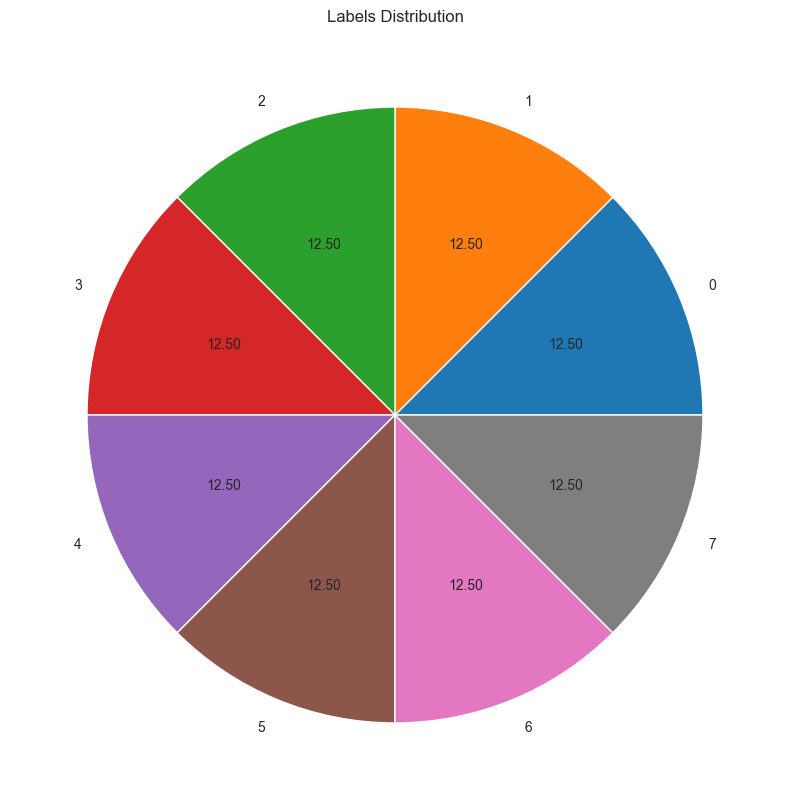

In [38]:
plt.title("Labels Distribution")
sm_dataset.groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))